# Phân tích gian lận thi cử 2018 (tỉnh Hà Giang) 
---

## Các bước thực hiện:
1. Thống kê điểm thi các môn thi và các khối thi
2. Thống kê số thí sinh có điểm các khối > 27 trong tỉnh và cả nước

___Thư viện:___

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import json

___Load dữ liệu:___

In [2]:
with open('Dataset.json', encoding="utf8") as json_file:
    provinces = json.load(json_file)
data = {}
for province in provinces:
    data[province['province']] = pd.read_csv(province['file'])

## Phân bố điểm thi các môn thi và các khối thi

In [3]:
# tạo trục x
def makeXAxis(start, step, end):
  x_axis = []
  pre = start
  while True:
    next = pre + step
    if next > end:
      next = num
    x_axis.append((pre, next))
    pre += step
    if pre >= end:
      break
  return x_axis

# tạo dữ liệu trục y
def makeYAxis(s, x_axis):
  y_axis_values = {}
  for i in x_axis:
    y_axis_values[i] = []

  for i in s:
    for j in x_axis:
      if j[1] == x_axis[-1][1]:
        if i >= j[0] and i <= j[1]:
          y_axis_values[j].append(i)
      elif i >= j[0] and i < j[1]:
        y_axis_values[j].append(i)

  y_axis = []
  for i in x_axis:
    y_axis.append(len(y_axis_values[i]))
  return y_axis

# vẽ biểu đồ cột khi có x, y
def drawBarChart(x_axis, y_axis, title, x_label, y_label, size):
  plt.figure(figsize=size)
  plt.xticks(rotation = 90)
  plt.bar([str(i) for i in x_axis], y_axis, color ='blue')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

### Toán

__Nhận xét:__

### Ngữ văn

__Nhận xét:__

### Ngoại ngữ

### Vật lý

### Hóa học

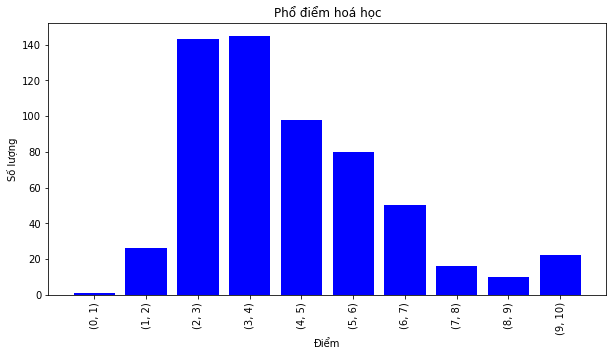

In [4]:
hh = data['Hà Giang']['HÓA']
x_axis_hh = makeXAxis(0,1,10)
y_axis_hh = makeYAxis(hh, x_axis_hh)
drawBarChart(x_axis_hh, y_axis_hh, 'Phổ điểm hoá học', 'Điểm', 'Số lượng', (10,5))

__Nhận xét:__ Hình dáng của phổ điểm không tuân theo phân phối chuẩn. Trong đó, số điểm từ 9 đến 10 tăng một cách bất thường và nhiều hơn cả số điểm từ 7 đến 9. Rõ ràng đây là một dấu hiệu đáng được chú ý trong quá trình rà soát gian lận thi cử.

### Sinh học

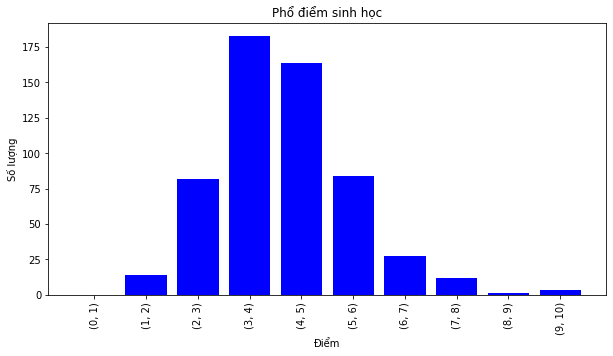

In [5]:
sh = data['Hà Giang']['SINH']
x_axis_sh = makeXAxis(0,1,10)
y_axis_sh = makeYAxis(sh,x_axis_sh)
drawBarChart(x_axis_sh, y_axis_sh, 'Phổ điểm sinh học', 'Điểm', 'Số lượng', (10,5))

__Nhận xét:__ Thông qua xem xét hình dáng phân phối điểm, người phân tích không phát hiện bất thường trong điểm số môn Sinh học của tỉnh Hà Giang.

### Lịch sử

### Địa lý

### Giáo dục công dân

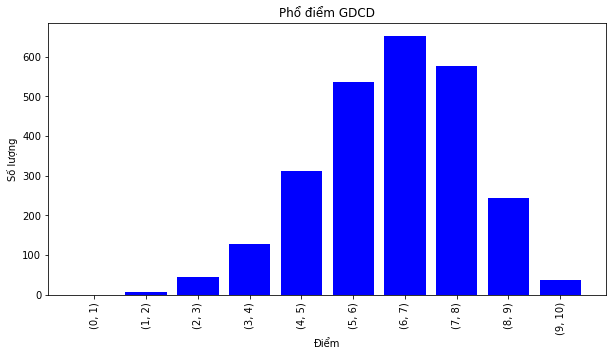

In [6]:
gd = data['Hà Giang']['GDCD']
x_axis_gd = makeXAxis(0,1,10)
y_axis_gd = makeYAxis(gd, x_axis_gd)
drawBarChart(x_axis_gd, y_axis_gd, 'Phổ điểm GDCD', 'Điểm', 'Số lượng', (10,5))

__Nhận xét:__ Thông qua xem xét hình dáng phân phối điểm, người phân tích không phát hiện bất thường trong điểm số môn Giáo dục công dân của tỉnh Hà Giang.

## Demo thống kê trên 27 điểm

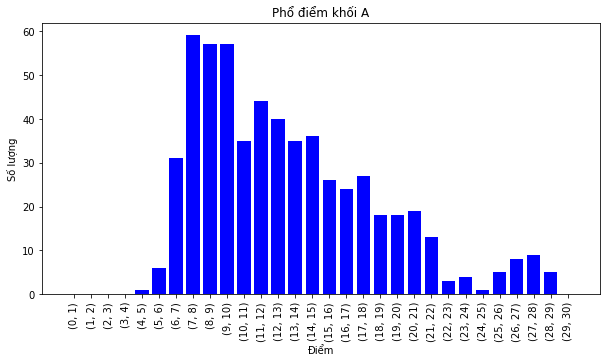

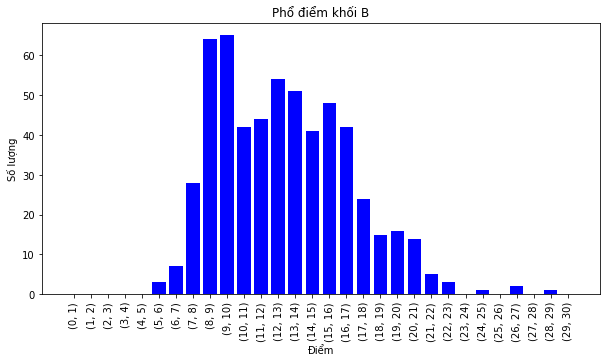

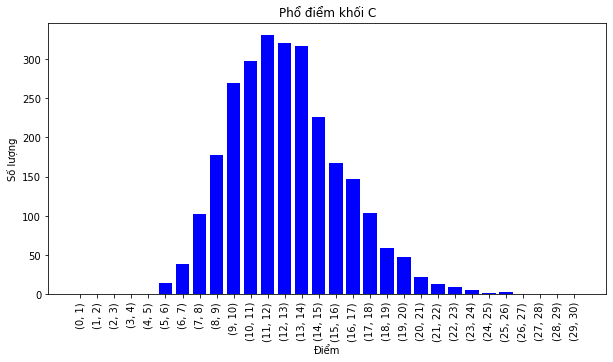

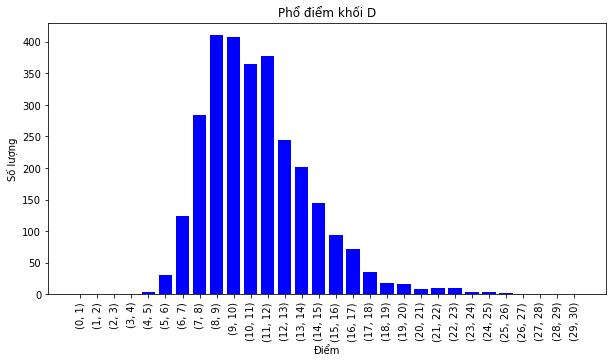

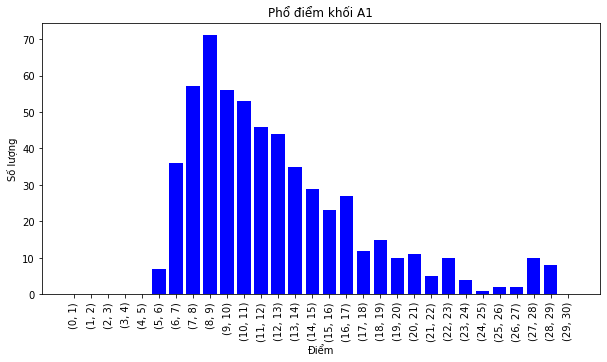

In [30]:
x_axis = makeXAxis(0,1,30)
y_axis_gradeA = makeYAxis(data['Hà Giang']['KHỐI A'], x_axis)
y_axis_gradeB = makeYAxis(data['Hà Giang']['KHỐI B'], x_axis)
y_axis_gradeC = makeYAxis(data['Hà Giang']['KHỐI C'], x_axis)
y_axis_gradeD = makeYAxis(data['Hà Giang']['KHỐI D'], x_axis)
y_axis_gradeA1 = makeYAxis(data['Hà Giang']['KHỐI A1'], x_axis)

draw(x_axis_gradeA, y_axis_gradeA, 'Phổ điểm khối A', 'Điểm', 'Số lượng', (10,5))
draw(x_axis_gradeA, y_axis_gradeB, 'Phổ điểm khối B', 'Điểm', 'Số lượng', (10,5))
draw(x_axis_gradeA, y_axis_gradeC, 'Phổ điểm khối C', 'Điểm', 'Số lượng', (10,5))
draw(x_axis_gradeA, y_axis_gradeD, 'Phổ điểm khối D', 'Điểm', 'Số lượng', (10,5))
draw(x_axis_gradeA, y_axis_gradeA1, 'Phổ điểm khối A1', 'Điểm', 'Số lượng', (10,5))